In [243]:
%pylab inline
import pandas as pd
import re
import os
import nltk
from nltk import RegexpParser
from nltk import word_tokenize
from nltk import sent_tokenize
import seaborn as sns
from readability import Readability
from nltk.sentiment.vader import SentimentIntensityAnalyzer 
from spellchecker import SpellChecker
from textstat.textstat import textstatistics
import textstat
import matplotlib.pyplot as plt

Populating the interactive namespace from numpy and matplotlib


/Users/dakshatajain/anaconda3/lib/python3.7/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['full', 'datetime']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [244]:
bulletins=os.listdir("/Users/dakshatajain/Desktop/SCU/Spring_Quarter/Machine Learning/Assignments/Project/Job Bulletins/")

In [245]:
path = '/Users/dakshatajain/Desktop/SCU/Spring_Quarter/Machine Learning/Assignments/Project/Job Bulletins/'

### Main Dataframe:

In [246]:
#Define function to create a dictionary for each file.
def createdict(lines):
    canonical_equal = 'AN EQUAL EMPLOYEMENT OPPORTUNITY EMPLOYER'
    title_renames = dict()
    for k in ['REQUIREMENT/ MINIMUM QUALIFICATION',
              'REQUIREMENT',
              'REQUIREMENT/ MINIMUM QUALIFICATION',
              'REQUIREMENT/MIMINUMUM QUALIFICATION',
              'REQUIREMENT/MINIMUM QUALIFICAITON',
              'REQUIREMENT/MINIMUM QUALIFICATION',
              'REQUIREMENT/MINIMUM QUALIFICATIONS',
              'REQUIREMENT/MINUMUM QUALIFICATION',
              'REQUIREMENTS',
              'REQUIREMENTS/ MINIMUM QUALIFICATIONS',
              'REQUIREMENTS/MINIMUM QUALIFCATIONS',
              'REQUIREMENTS/MINIMUM QUALIFICATIONS',
              'REQUIREMENTS/MINIMUM REQUIREMENTS',
              'REQUIREMENTS/MINUMUM QUALIFICATIONS']:
        title_renames[k] = 'REQUIREMENTS'
    for k in ['AN EQUAL EMPLOMENT OPPORTUNITY EMPLOYER',
              'AN EQUAL EMPLOYEMENT OPPORTUNITY EMLOYER',
              'AN EQUAL EMPLOYEMENT OPPORTUNITY EMPLOYER',
              'AN EQUAL EMPLOYMENT OPPORTUINTY EMPLOYER',
              'AN EQUAL EMPLOYMENT OPPORTUNITY',
              'AN EQUAL EMPLOYMENT OPPORTUNITY EMPLOYEE',
              'AN EQUAL EMPLOYMENT OPPORTUNITY EMPLOYER',
              'AN EQUAL EMPLOYMENT OPPORTUNITY EMPOYER',
              'AN EQUAL EMPLOYMENT OPPORUNITY EMPLOYER',
              'AN EQUAL EMPLOYMENT OPPPORTUNITY EMPLOYER',
              'AN EQUAL EMPLOYMENT OPPROTUNITY EMPLOYER',
              'AN EQUAL OPPORTUNITY EMPLOYER']:
        title_renames[k] = 'AN EQUAL EMPLOYEMENT OPPORTUNITY EMPLOYER'
    for k in ['ANNUALSALARY','ANNUAL SALARY']:
        title_renames[k] = 'ANNUAL SALARY'   
    for k in ['SELECTION PROCEDURE','SELELCTION PROCESS','SELECTION PROCESS']:
        title_renames[k]='SELECTION PROCEDURE'
    for k in ['QUALICATIONS REVIEW', 'QUALIFICATIONS REVIEW']:
        title_renames[k]='QUALIFICATIONS REVIEW'
    for k in ['PROCESS NOTE','PROCESS NOTES']:
        title_renames[k]='PROCESS NOTES'
    for k in ['DUTIES', 'DUTIES AND RESPONSIBILITIES']:
        title_renames[k]='DUTIES'
    
    
        
    # Skip empty lines in the beginning.
    idx = 0
    while len(lines[idx].rstrip(' \n\r\t')) == 0:
        idx = idx + 1
    d = {}
    d['TITLE'] = lines[idx].rstrip('\r\n\t')
    curr_title = ''
    for l in lines[idx+1:]:
        if 'Open Date' in l:
            curr_title='OPEN DATE'
            d[curr_title]=[]
            d[curr_title].append(l.rstrip(' \n\t').split(':')[1])
            
        elif re.search('^[A-Z][A-Z /]+$', l):
            l = l.rstrip('\n\t ')
            curr_title = l
            if curr_title in title_renames:
                curr_title = title_renames[curr_title]
            if curr_title not in d:
                d[curr_title] = []
        elif curr_title != '':
            d[curr_title].append(l.strip(' \n\t'))
    return d   

In [247]:
#Define function to create dictionary for each files.
def createlistofdict(path):
    dicts = []
    for f in os.listdir(path):
        file = open(path+'/'+f,'r',encoding ='latin-1')
        d = createdict(file.readlines()) #Call createdict function inside
        dicts.append(d)
    return dicts

In [248]:
#Define dataframe from dictionary
df = pd.DataFrame(createlistofdict(path)) 
df.head(2)

,ADDITIONAL JOB INFORMATION,ALLOWABLE CALCULATORS,AN EQUAL EMPLOYEMENT OPPORTUNITY EMPLOYER,AN INTERDEPARTMENTAL PROMOTIONAL AND AN OPEN COMPETITIVE BASIS,AN INTERDEPARTMENTAL PROMOTIONAL AND OPEN COMPETITIVE BASIS,AN INTERDEPARTMENTAL PROMOTIONAL BASIS,AN OPEN COMPETITIVE BASIS,AND ON AN INTERDEPARTMENTAL PROMOTIONAL BASIS,ANNUAL SALARY,APPLICATION DEADLINE,...,THIS EXAMINATION IS TO BE GIVEN ON BOTH AN,THIS EXAMINATION IS TO BE GIVEN ONLY,THIS EXAMINATION IS TO BE GIVEN ONLY ON,THIS EXAMINATION IS TO BE GIVEN ONLY ON AN,THIS EXAMINATION IS TO BE GIVEN ONLY ON AN OPEN COMPETITIVE BASIS,THIS EXAMINATION IS TO BE GIVEN TO BOTH ON AN,TITLE,VACANCIES,VOCATIONAL WORKER I,WHERE TO APPLY
0,NaN,NaN,[For additional information and FAQs regarding...,NaN,NaN,NaN,NaN,NaN,"[, $90,410 to $109,306, , NOTE:, , 1. Annual s...","[, Applications must be received by THURSDAY, ...",...,NaN,[],NaN,NaN,NaN,NaN,SENIOR HOUSING INSPECTOR,NaN,NaN,"[, Applications will only be accepted on-line...."
1,NaN,NaN,[],NaN,NaN,NaN,NaN,NaN,"[, $76,379 to $111,624 and $82,476 to $120,582...","[, Applications must be received by THURSDAY, ...",...,NaN,[],NaN,NaN,NaN,NaN,LEGISLATIVE ASSISTANT,NaN,NaN,"[, Applications will only be accepted on-line...."


In [249]:
df.columns

Index(['ADDITIONAL JOB INFORMATION', 'ALLOWABLE CALCULATORS',
       'AN EQUAL EMPLOYEMENT OPPORTUNITY EMPLOYER',
       'AN INTERDEPARTMENTAL PROMOTIONAL AND AN OPEN COMPETITIVE BASIS',
       'AN INTERDEPARTMENTAL PROMOTIONAL AND OPEN COMPETITIVE BASIS',
       'AN INTERDEPARTMENTAL PROMOTIONAL BASIS', 'AN OPEN COMPETITIVE BASIS',
       'AND ON AN INTERDEPARTMENTAL PROMOTIONAL BASIS', 'ANNUAL SALARY',
       'APPLICATION DEADLINE', 'APPLICATION PROCESS', 'APPOINTMENT',
       'APPOINTMENT IS SUBJECT TO', 'APPROVED TEST ITEMS FACT SHEET',
       'BUREAU OF SANITATION', 'CERTIFICATION',
       'COMPETITIVE AND INTERDEPARTMENTAL PROMOTIONAL BASIS',
       'CONDITIONS OF EMPLOYMENT', 'DUTIES', 'EMPLOYEES',
       'EQUAL EMPLOYMENT OPPORTUNITY EMPLOYER', 'EQUAL EMPLOYMENT OPPORUNITY',
       'EXEMPT EMPLOYMENT', 'EXEMPT EMPLOYMENT OPPORTUNITY',
       'EXPERT REVIEW COMMITTEE',
       'FOR EXEMPT EMPLOYEES SEEKING TO BECOME CIVIL SERVICE',
       'GENERAL INFORMATION ABOUT EXEMPT EMPLOYM

In [250]:
df2 = df[['TITLE','ANNUAL SALARY','OPEN DATE','APPLICATION DEADLINE','REQUIREMENTS', 'APPLICATION PROCESS','DUTIES','HOW TO APPLY'
       ,'PROCESS NOTES', 'QUALIFICATIONS REVIEW',
       'SELECTION PROCEDURE',
       'WHERE TO APPLY','ADDITIONAL JOB INFORMATION']]
df2.head(2)

,TITLE,ANNUAL SALARY,OPEN DATE,APPLICATION DEADLINE,REQUIREMENTS,APPLICATION PROCESS,DUTIES,HOW TO APPLY,PROCESS NOTES,QUALIFICATIONS REVIEW,SELECTION PROCEDURE,WHERE TO APPLY,ADDITIONAL JOB INFORMATION
0,SENIOR HOUSING INSPECTOR,"[, $90,410 to $109,306, , NOTE:, , 1. Annual s...","[ 04-27-18, (Exam Open to Current City Employ...","[, Applications must be received by THURSDAY, ...","[, Two years of full-time paid experience with...",NaN,"[, A Senior Housing Inspector supervises emplo...",NaN,"[, 1. Applicants who lack six months or less o...",NaN,"[, Examination Weight: Essay . . . . . . . . ...","[, Applications will only be accepted on-line....",NaN
1,LEGISLATIVE ASSISTANT,"[, $76,379 to $111,624 and $82,476 to $120,582...","[ 09-18-15, (Exam Open to Current City Employ...","[, Applications must be received by THURSDAY, ...","[, One year of full-time paid experience in a ...",NaN,"[, A Legislative Assistant serves one or more ...",NaN,NaN,NaN,"[, Examination Weights: Essay . . . . . . . . ...","[, Applications will only be accepted on-line....",NaN


#### Merging Similar Columns: [Requirements, Duties, Process Notes] and [Where to, How to, Application Process]

In [251]:
df3 = df2.copy()
for row in df3.loc[df['REQUIREMENTS'].isna(), 'REQUIREMENTS'].index:
        df3.at[row, 'REQUIREMENTS'] = []
for row in df3.loc[df['PROCESS NOTES'].isna(), 'PROCESS NOTES'].index:
        df3.at[row, 'PROCESS NOTES'] = []
for row in df3.loc[df['DUTIES'].isna(), 'DUTIES'].index:
        df3.at[row, 'DUTIES'] = []

    
df3['REQ_MERGED']=df3['REQUIREMENTS']+df3['PROCESS NOTES']+df3['DUTIES']

In [252]:

for row in df3.loc[df['APPLICATION PROCESS'].isna(), 'APPLICATION PROCESS'].index:
        df3.at[row, 'APPLICATION PROCESS'] = []
for row in df3.loc[df['WHERE TO APPLY'].isna(), 'WHERE TO APPLY'].index:
        df3.at[row, 'WHERE TO APPLY'] = []
for row in df3.loc[df['HOW TO APPLY'].isna(), 'HOW TO APPLY'].index:
        df3.at[row, 'HOW TO APPLY'] = []


df3['APPLIC_MERGED']=df3['APPLICATION PROCESS']+df3['WHERE TO APPLY']+df3['HOW TO APPLY']
df3.head(2)

,TITLE,ANNUAL SALARY,OPEN DATE,APPLICATION DEADLINE,REQUIREMENTS,APPLICATION PROCESS,DUTIES,HOW TO APPLY,PROCESS NOTES,QUALIFICATIONS REVIEW,SELECTION PROCEDURE,WHERE TO APPLY,ADDITIONAL JOB INFORMATION,REQ_MERGED,APPLIC_MERGED
0,SENIOR HOUSING INSPECTOR,"[, $90,410 to $109,306, , NOTE:, , 1. Annual s...","[ 04-27-18, (Exam Open to Current City Employ...","[, Applications must be received by THURSDAY, ...","[, Two years of full-time paid experience with...",[],"[, A Senior Housing Inspector supervises emplo...",[],"[, 1. Applicants who lack six months or less o...",NaN,"[, Examination Weight: Essay . . . . . . . . ...","[, Applications will only be accepted on-line....",NaN,"[, Two years of full-time paid experience with...","[, Applications will only be accepted on-line...."
1,LEGISLATIVE ASSISTANT,"[, $76,379 to $111,624 and $82,476 to $120,582...","[ 09-18-15, (Exam Open to Current City Employ...","[, Applications must be received by THURSDAY, ...","[, One year of full-time paid experience in a ...",[],"[, A Legislative Assistant serves one or more ...",[],[],NaN,"[, Examination Weights: Essay . . . . . . . . ...","[, Applications will only be accepted on-line....",NaN,"[, One year of full-time paid experience in a ...","[, Applications will only be accepted on-line...."


In [385]:
df2[['TITLE','ANNUAL SALARY','OPEN DATE','APPLICATION DEADLINE','DUTIES','PROCESS NOTES','SELECTION PROCEDURE']]

,TITLE,ANNUAL SALARY,OPEN DATE,APPLICATION DEADLINE,DUTIES,PROCESS NOTES,SELECTION PROCEDURE
0,SENIOR HOUSING INSPECTOR,"[, $90,410 to $109,306, , NOTE:, , 1. Annual s...","[ 04-27-18, (Exam Open to Current City Employ...","[, Applications must be received by THURSDAY, ...","[, A Senior Housing Inspector supervises emplo...","[, 1. Applicants who lack six months or less o...","[, Examination Weight: Essay . . . . . . . . ..."
1,LEGISLATIVE ASSISTANT,"[, $76,379 to $111,624 and $82,476 to $120,582...","[ 09-18-15, (Exam Open to Current City Employ...","[, Applications must be received by THURSDAY, ...","[, A Legislative Assistant serves one or more ...",NaN,"[, Examination Weights: Essay . . . . . . . . ..."
2,DISTRICT SUPERVISOR ANIMAL SERVICES,"[, $76,128 to $111,332, , NOTES:, , 1. Annual ...","[ 02-23-18, (Exam Open to Current City Employ...","[, Applications must be received by THURSDAY, ...","[, A District Supervisor Animal Services (Dist...","[, 1. Applicants who lack six months or less o...","[, After meeting minimum qualifications candid..."
3,LEGISLATIVE REPRESENTATIVE,"[, $91,851 to $134,300, The salary in the Harb...","[ 12-29-17, (Exam Open to All, including Curr...","[, Applications and Qualifications Questionnai...","[, A Legislative Representative represents the...","[, 1. In addition to the regular City applicat...","[, After meeting minimum qualifications, and i..."
4,GALLERY ATTENDANT,"[, $36,874 to $49,694, , NOTE:, , The current ...","[ 09-25-15, (Exam Open to All, including Curr...","[, Applications must be received by THURSDAY, ...","[, A Gallery Attendant assists in the construc...",NaN,"[, Examination Weight: Interview . . . . . . ..."
5,TRUCK AND EQUIPMENT DISPATCHER,"[, $72,036 to $89,470; $74,896 to $93,041; $78...","[ 05-26-17, (Exam Open to Current City Employ...","[, Applications must be received by THURSDAY, ...","[, A Truck and Equipment Dispatcher assigns, r...","[, 1. Applicants who lack six months or less o...","[, After meeting minimum qualifications, candi..."
6,COMMUNICATIONS CABLE SUPERVISOR,"[, $72,745 to $87,988; $77,401 to $93,584; and...","[ 05-19-17, Revised: 06-01-17, (Exam Open to ...","[, Applications must be received by THURSDAY, ...","[, A Communications Cable Supervisor assigns, ...","[, 1. In addition to the regular City applicat...","[, After meeting minimum qualifications, candi..."
7,SHIP CARPENTER,"[, $82,350 (flat-rated), , NOTE:, , The curren...","[ 09-30-16, (Exam Open to All, including Curr...","[, Applications must be received by THURSDAY, ...","[, A Ship Carpenter does specialized carpentry...","[, 1. Applicants who lack six months or less o...","[, After meeting minimum qualifications, and i..."
8,PRINCIPAL SECURITY OFFICER,"[, $49,882 to $ 72,975, The salary in the Depa...","[ 11-02-18, (Exam Open to Current City Employe...","[, Applications must be received by THURSDAY, ...","[, A Principal Security Officer assists in dir...","[, 1. Applicants who lack six months or less o...","[, Examination Weights: Essay . . . . . . . ...."
9,PRINCIPAL CIVIL ENGINEERING DRAFTING TECHNICIAN,"[, $67,964 to $99,347, The salary in the Depar...","[ 11-02-18, (Exam Open to Current City Emplo...","[, Applications must be received by THURSDAY, ...","[, A Principal Civil Engineering Drafting Tech...","[, 1. Applicants who lack six months or less o...","[, Examination Weight: Essay . . . . . . . . ..."


## FEATURE EXTRACTION:

### 1.Duration: Calculating the time duration for which application is open 

#### Cleaning Open Date and Application Deadline:

Function to convert list to string:

In [253]:
def list_to_string(ls):
    stringed=''
    try:
       stringed =" ".join(str(e) for e in ls)
    except:
       print('Error')
    return stringed

In [254]:
for i in range(len(df3)):
    try:
        df3['OPEN DATE'][i] = df3['OPEN DATE'][i][0]
    except:
        df3['OPEN DATE'][i] = df3['OPEN DATE'][i]

df3['OPEN DATE'] = df3['OPEN DATE'].str.strip()
df3['OPEN DATE'] =  pd.to_datetime(df3['OPEN DATE'], errors='coerce')

In [255]:
for i in range(len(df3)):
    try:
        df3['APPLICATION DEADLINE'][i] = ''.join(df3['APPLICATION DEADLINE'][i]).lower()
        df3['APPLICATION DEADLINE'][i] = re.search(r'(january|february|march|april|may|june|july|august|september|october|november|december)\s(\d{1,2},\s\d{4})'
                                ,df3['APPLICATION DEADLINE'][i]).group()
        #df3['APPLICATION DEADLINE'][i] = datetime.strptime(df3['APPLICATION DEADLINE'][i] , "%B %d, %Y").date()
        
    except:
        df3['APPLICATION DEADLINE'][i] = np.nan

/Users/dakshatajain/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/dakshatajain/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/Users/dakshatajain/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__m

In [256]:
from datetime import datetime

for i in range(len(df3)):
    try:
        df3['APPLICATION DEADLINE'][i] = (datetime.strptime(df3['APPLICATION DEADLINE'][i] ,"%B %d, %Y").date())
    except:
        df3['APPLICATION DEADLINE'][i] = np.nan

/Users/dakshatajain/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/Users/dakshatajain/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [257]:
df3['APPLICATION DEADLINE'] = pd.to_datetime(df3['APPLICATION DEADLINE'], errors='coerce')

In [259]:
df3['Duration'] = df3['APPLICATION DEADLINE'] - df3['OPEN DATE']

df3.Duration = pd.to_timedelta(df3.Duration)
df3.Duration = df3.Duration.fillna(0)

In [260]:
df3['Duration'] = df3['Duration'].astype(str).str.split().str[:1].apply(list_to_string)
df3['Duration'] = df3['Duration'].astype(int)

In [261]:
df3['Binned_Duration']= pd.cut(df3['Duration'],bins=[0,10,20,30,40,50,1000])

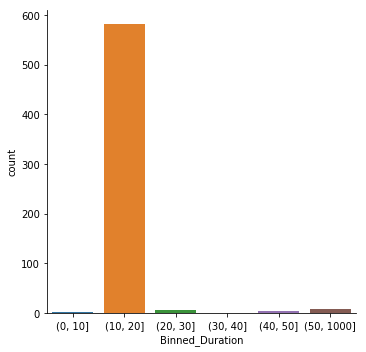

In [262]:
sns.catplot(data=df3,x='Binned_Duration',kind = 'count')

Majority of the JD are open/available for less than 20. There may be multiple reasons for this. However, such a short application deadline might lead in decrease in the applicant pool

So as per our assumption:
Good JD: > 20 days and Bad JD: < 20 days


## 2. Requirement_Experience_years:

In [263]:
full = []
pattern = re.compile(r'(one|two|three|four|five|six|seven|eigth|nine|ten)(\s-?)(years?)\s(of\sfull-time) | (one|two|three|four|five|six|seven|eigth|nine|ten)(\s-?)(months?)\s(of\sfull-time)')

for index, row in df3.iterrows():
    a = ''.join(row['REQUIREMENTS']).lower()
    if(re.search(pattern,a)):
        b = re.search(pattern,a).group()
        full.append(1)
    else:
        full.append(0)

df3['REQ_EXP_YEARS'] = full
df3.head(2)

,TITLE,ANNUAL SALARY,OPEN DATE,APPLICATION DEADLINE,REQUIREMENTS,APPLICATION PROCESS,DUTIES,HOW TO APPLY,PROCESS NOTES,QUALIFICATIONS REVIEW,SELECTION PROCEDURE,WHERE TO APPLY,ADDITIONAL JOB INFORMATION,REQ_MERGED,APPLIC_MERGED,Duration,Binned_Duration,REQ_EXP_YEARS
0,SENIOR HOUSING INSPECTOR,"[, $90,410 to $109,306, , NOTE:, , 1. Annual s...",2018-04-27,2018-05-10,"[, Two years of full-time paid experience with...",[],"[, A Senior Housing Inspector supervises emplo...",[],"[, 1. Applicants who lack six months or less o...",NaN,"[, Examination Weight: Essay . . . . . . . . ...","[, Applications will only be accepted on-line....",NaN,"[, Two years of full-time paid experience with...","[, Applications will only be accepted on-line....",13,"(10, 20]",1
1,LEGISLATIVE ASSISTANT,"[, $76,379 to $111,624 and $82,476 to $120,582...",2015-09-18,2015-10-01,"[, One year of full-time paid experience in a ...",[],"[, A Legislative Assistant serves one or more ...",[],[],NaN,"[, Examination Weights: Essay . . . . . . . . ...","[, Applications will only be accepted on-line....",NaN,"[, One year of full-time paid experience in a ...","[, Applications will only be accepted on-line....",13,"(10, 20]",1


In [264]:
df3['REQ_EXP_YEARS'].value_counts()

1    587
0     97
Name: REQ_EXP_YEARS, dtype: int64

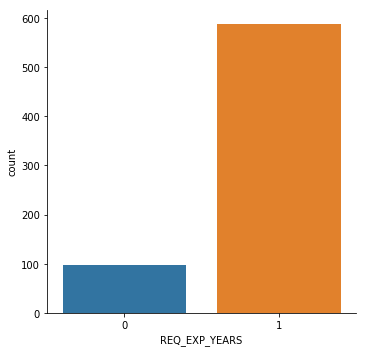

In [265]:
sns.catplot(data=df3,x='REQ_EXP_YEARS',kind = 'count')

Majority of the JD (more than 85%) have experience mentioned

## 3. Complexity of Selection Process:

In [266]:
all_values = []
for i in range(len(df3)): 
    try:
        record_list = []
        for j in df3['SELECTION PROCEDURE'][i]:
            value = [z[0] for z in re.findall('([A-Z][a-z]+)((\s\.\s)+)',j)]
            if value != []:
                record_list.append(value)
        all_values.append(len(record_list))
    except:
        all_values.append(float(nan))
        
df3['Selection_Process_Complexity'] = all_values
df3.head(2)

,TITLE,ANNUAL SALARY,OPEN DATE,APPLICATION DEADLINE,REQUIREMENTS,APPLICATION PROCESS,DUTIES,HOW TO APPLY,PROCESS NOTES,QUALIFICATIONS REVIEW,SELECTION PROCEDURE,WHERE TO APPLY,ADDITIONAL JOB INFORMATION,REQ_MERGED,APPLIC_MERGED,Duration,Binned_Duration,REQ_EXP_YEARS,Selection_Process_Complexity
0,SENIOR HOUSING INSPECTOR,"[, $90,410 to $109,306, , NOTE:, , 1. Annual s...",2018-04-27,2018-05-10,"[, Two years of full-time paid experience with...",[],"[, A Senior Housing Inspector supervises emplo...",[],"[, 1. Applicants who lack six months or less o...",NaN,"[, Examination Weight: Essay . . . . . . . . ...","[, Applications will only be accepted on-line....",NaN,"[, Two years of full-time paid experience with...","[, Applications will only be accepted on-line....",13,"(10, 20]",1,2.0
1,LEGISLATIVE ASSISTANT,"[, $76,379 to $111,624 and $82,476 to $120,582...",2015-09-18,2015-10-01,"[, One year of full-time paid experience in a ...",[],"[, A Legislative Assistant serves one or more ...",[],[],NaN,"[, Examination Weights: Essay . . . . . . . . ...","[, Applications will only be accepted on-line....",NaN,"[, One year of full-time paid experience in a ...","[, Applications will only be accepted on-line....",13,"(10, 20]",1,2.0


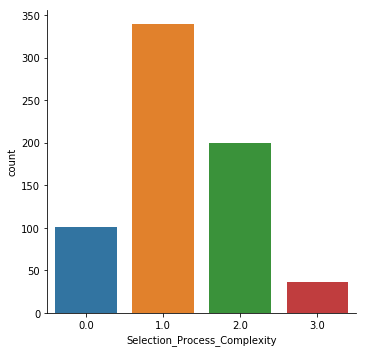

In [267]:
sns.catplot(data=df3,x='Selection_Process_Complexity',kind = 'count')

## 4.Present or Not:

### Creating Variable to indicate if annual salary present or not :

In [268]:
df3['Annual_Salary_Present'] = (~df3['ANNUAL SALARY'].isna()) * 1 

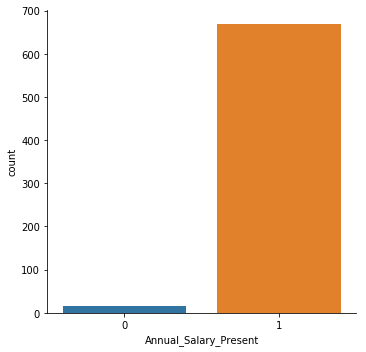

In [269]:
sns.catplot(data=df3,x='Annual_Salary_Present',kind = 'count')

### Creating Variable to indicate if additional info present or not :

In [270]:
df3['Additional_info_Present'] = (~df3['ADDITIONAL JOB INFORMATION'].isna()) * 1

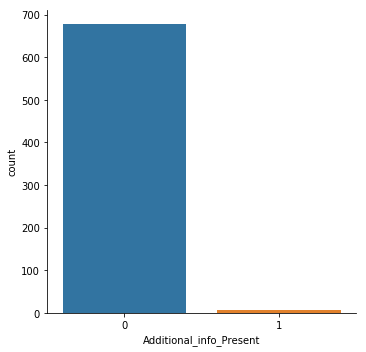

In [271]:
sns.catplot(data=df3,x='Additional_info_Present',kind = 'count')

### Creating Variable to indicate if qualification review present or not :

In [272]:
df3['Qualifications_review_Present'] = (~df3['QUALIFICATIONS REVIEW'].isna()) * 1

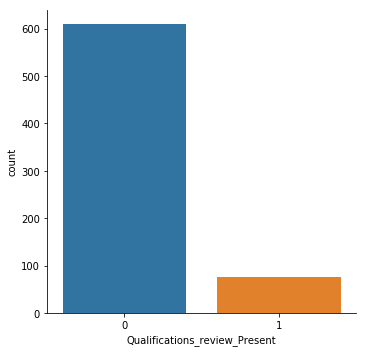

In [273]:
sns.catplot(data=df3,x='Qualifications_review_Present',kind = 'count')

In [274]:
df3.drop(columns=['ANNUAL SALARY','QUALIFICATIONS REVIEW','ADDITIONAL JOB INFORMATION','OPEN DATE','APPLICATION DEADLINE'],axis=1,inplace=True)

## 5. Full Time:

In [275]:
full=[]
for index, row in df3.iterrows(): 
    a = ''.join(row['REQUIREMENTS']).lower()
    if(re.search(r'full(-?)[ *]time',a)):
        full.append(1)
    elif ((re.search(r'part(-?)[ *]time',a))):
        full.append(1)
    else:
        full.append(0)

df3['FULL/PART']=full
df3.head(2)

,TITLE,REQUIREMENTS,APPLICATION PROCESS,DUTIES,HOW TO APPLY,PROCESS NOTES,SELECTION PROCEDURE,WHERE TO APPLY,REQ_MERGED,APPLIC_MERGED,Duration,Binned_Duration,REQ_EXP_YEARS,Selection_Process_Complexity,Annual_Salary_Present,Additional_info_Present,Qualifications_review_Present,FULL/PART
0,SENIOR HOUSING INSPECTOR,"[, Two years of full-time paid experience with...",[],"[, A Senior Housing Inspector supervises emplo...",[],"[, 1. Applicants who lack six months or less o...","[, Examination Weight: Essay . . . . . . . . ...","[, Applications will only be accepted on-line....","[, Two years of full-time paid experience with...","[, Applications will only be accepted on-line....",13,"(10, 20]",1,2.0,1,0,0,0
1,LEGISLATIVE ASSISTANT,"[, One year of full-time paid experience in a ...",[],"[, A Legislative Assistant serves one or more ...",[],[],"[, Examination Weights: Essay . . . . . . . . ...","[, Applications will only be accepted on-line....","[, One year of full-time paid experience in a ...","[, Applications will only be accepted on-line....",13,"(10, 20]",1,2.0,1,0,0,0


In [276]:
df3['FULL/PART'].value_counts()

0    671
1     13
Name: FULL/PART, dtype: int64

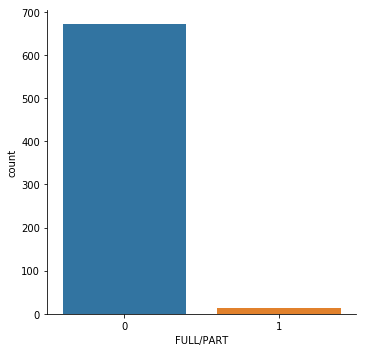

In [277]:
sns.catplot(data=df3,x='FULL/PART',kind = 'count')

## 6.Word Count - Section [Requirements_Merged, Application_Merged]

In [278]:
# Create strings from column values
df3['REQ_MERGED_STR'] = df3.REQ_MERGED.apply(list_to_string)
df3['APPLIC_MERGED_STR'] = df3.APPLIC_MERGED.apply(list_to_string)
df3['SELECTION_PROCEDURE_STR']  = df3['SELECTION PROCEDURE'].apply(list_to_string)

Error
Error
Error
Error
Error
Error
Error
Error


In [279]:
def countwords_sections(ls):
    words = ls.split()
    return len(words)

df3['REQ_MERGED_WORDCOUNT'] = df3['REQ_MERGED_STR'].apply(countwords_sections)
df3['APPLIC_MERGED_WORDCOUNT'] = df3['APPLIC_MERGED_STR'].apply(countwords_sections)
df3['SELECTION_PROCEDURE_WORDCOUNT']  = df3['SELECTION_PROCEDURE_STR'].apply(countwords_sections)

## 7.School Type:

In [280]:
def schooltype(ls):
    ALIST = []
    if  re.search(r'(college or university)\s',ls):
        r = re.search(r'(college or university)\s',ls).group()
        ALIST.append(r)
    if  re.search(r'(high school)\s',ls):
        s = re.search(r'(high school)\s',ls).group()
        ALIST.append(s)
    if  re.search(r'(apprenticeship)\s',ls):
        m = re.search(r'(apprenticeship)\s',ls).group()
        ALIST.append(m) 
    return ALIST

df3['REQUIREMENTS_STR'] = df3['REQ_MERGED'].apply(list_to_string)
df3['SCHOOL_TYPE']  = df3['REQUIREMENTS_STR'].apply(schooltype)

In [281]:
df3['SCHOOL_TYPE'] = df3['SCHOOL_TYPE'].apply(list_to_string)

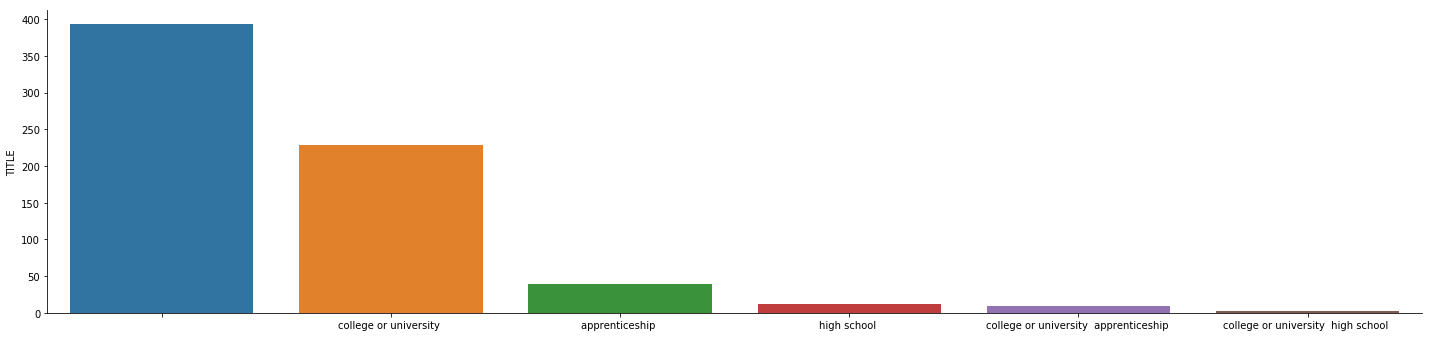

In [282]:
df4=df3.copy()
result = df4.groupby(["SCHOOL_TYPE"])['TITLE'].aggregate('count').reset_index().sort_values('TITLE',ascending=False)
ax=sns.catplot(data=result,x="SCHOOL_TYPE",y='TITLE',aspect=4,kind='bar')
ax.set(xlabel='')
plt.show()

In [283]:
df3['SCHOOL_PRESENT']=(df3['SCHOOL_TYPE']!='')*1

In [284]:
#df3=df3.drop(columns=['REQUIREMENTS_STR'])

## 8.Education Major:

In [285]:
def majortype(ls):
    s = re.search(r'(with a major in ([^;]*);)|(apprenticeship as a ([^;]*);)',ls)
    if s:
        return s.group()

df3['MAJOR'] = df3['REQUIREMENTS_STR'].apply(majortype)

In [286]:
df3.drop(columns = ['REQ_MERGED_STR','APPLIC_MERGED_STR','SELECTION_PROCEDURE_STR'],axis = 1,inplace = True)

## 9.Readability

In [287]:
def readability_scores(stringed):
    flesch_score=0
    flesch_grade=0
    automated_readability=0
    dale_chall=0
    gunning_fog=0
    flesch_score=textstat.flesch_reading_ease(stringed)
    flesch_grade=textstat.flesch_kincaid_grade(stringed)
    automated_readability=textstat.automated_readability_index(stringed)
    dale_chall=textstat.dale_chall_readability_score(stringed)
    gunning_fog=textstat.gunning_fog(stringed)
    return [flesch_score,flesch_grade,automated_readability,dale_chall,gunning_fog]

### 9a.Readability of Requirements Merged

In [288]:
df3['REQ_MERGED_UPD']=df3['REQ_MERGED'].apply(list_to_string)
df3['REQ_MERGED_SCORES']=df3.REQ_MERGED_UPD.apply(readability_scores)
df3['REQ_MERGED_SCORES'].head(2)

0    [-0.23, 22.6, 25.3, 9.67, 22.44]
1     [5.7, 22.4, 25.6, 10.21, 23.96]
Name: REQ_MERGED_SCORES, dtype: object

In [289]:
df3[['flesch_score_reqm','flesch_grade_reqm','automated_readability_reqm','dale_chall_reqm','gunning_fog_reqm']] = \
pd.DataFrame(df3.REQ_MERGED_SCORES.values.tolist(), index= df3.index)

### 9b.Readability of Selection Process

In [290]:
df3['SP_UPD']=df3['SELECTION PROCEDURE'].apply(list_to_string)
df3['SP_SCORES']=df3.SP_UPD.apply(readability_scores)
df3['SP_SCORES'].head(2)

Error
Error
Error
Error
Error
Error
Error
Error


0    [-14.07, 25.8, 27.6, 9.73, 23.99]
1    [-8.46, 25.7, 28.2, 10.14, 25.08]
Name: SP_SCORES, dtype: object

In [291]:
df3[['flesch_score_sp','flesch_grade_sp','automated_readability_sp','dale_chall_sp','gunning_fog_sp']] = \
pd.DataFrame(df3.SP_SCORES.values.tolist(), index= df3.index)

### 9c.Readability of Application Process

In [292]:
df3['AP_MERG_UPD']=df3['APPLIC_MERGED'].apply(list_to_string)
df3['AP_MERG_SCORES']=df3.AP_MERG_UPD.apply(readability_scores)

In [293]:
df3[['flesch_score_ap','flesch_grade_ap','automated_readability_ap','dale_chall_ap','gunning_fog_ap']] = \
pd.DataFrame(df3.AP_MERG_SCORES.values.tolist(), index= df3.index)

## 10.Parts Of Speech Tagging:

In [294]:
def tokenize(col):
    try:
        grammar = r"""
        NP:
            # Pronouns
            {<PRP.*>}
        """
        chunker = nltk.RegexpParser(grammar)
        ne = []
        tokens=nltk.word_tokenize(col)
        fil_tokens=[]
        for token in tokens:
            if token != '':
                fil_tokens.append(token)
        chunk = chunker.parse(nltk.pos_tag(fil_tokens))
        for tree in chunk.subtrees(filter=lambda t: t.label() == 'NP'):
            ne.append(' '.join([child[0] for child in tree.leaves()]))
    except:
        print('This Section is Blank')
    return ne

In [295]:
df3['REQ_Pronoun']=df3['REQ_MERGED_UPD'].apply(tokenize)
df3['REQ_Pronoun'].head()

0           [they, their]
1           [they, their]
2           [they, their]
3    [their, they, their]
4                 [their]
Name: REQ_Pronoun, dtype: object

In [296]:
pronouns=['you','your','yours','our','we','you\'ll']
def check_pronoun(ls):
    count=0
    for element in ls:
        element=element.lower()
        if element in pronouns:
            count=count+1
    return count

In [297]:
df3['REQ_Pronoun_Count']=df3['REQ_Pronoun'].apply(check_pronoun)

In [298]:
df3['REQ_Pronoun_Exists']=(df3.REQ_Pronoun_Count > 0 ) * 1
df3['REQ_Pronoun_Exists'].value_counts()

0    588
1     96
Name: REQ_Pronoun_Exists, dtype: int64

### POS Pronoun Tagging on Actual Job Descriptions

### 1. Google 

In [299]:
JD1="Google's software engineers develop the next-generation technologies that change how billions of users connect, explore, and interact with information and one another. Our products need to handle information at massive scale, and extend well beyond web search. We're looking for engineers who bring fresh ideas from all areas, including information retrieval, distributed computing, large-scale system design, networking and data storage, security, artificial intelligence, natural language processing, UI design and mobile; the list goes on and is growing every day. As a software engineer, you will work on a specific project critical to Google’s needs with opportunities to switch teams and projects as you and our fast-paced business grow and evolve. We need our engineers to be versatile, display leadership qualities and be enthusiastic to take on new problems across the full-stack as we continue to push technology forward. With your technical expertise you will manage project priorities, deadlines, and deliverables. You will design, develop, test, deploy, maintain, and enhance software solutions. As a Software Engineer working on Android mobile applications, you’ll drive new innovations and build beautiful user experiences. You’ll work with mobile developers and resources to drive the next generation of apps at Google. You will develop applications primarily in Java and using the Android Software Development Kit (SDK). You might design and develop open-source Android applications that are part of the Android Open Source Project (AOSP) or closed-source Google applications that are the interface to Google services on Android. Google is and always will be an engineering company. We hire people with a broad set of technical skills who are ready to take on some of technology's greatest challenges and make an impact on millions, if not billions, of users. At Google, engineers not only revolutionize search, they routinely work on massive scalability and storage solutions, large-scale applications and entirely new platforms for developers around the world. From Google Ads to Chrome, Android to YouTube, Social to Local, Google engineers are changing the world one technological achievement after another."

In [300]:
JD2="The Strategic Vendor Management group within Corporate Engineering is responsible for managing vendors and contingent workforce for our business partners. You'll lead projects for the Vendor Operations Program Office team, setting priorities, leading cross-functional teams, ensuring success metrics are informing future efforts, and quickly fine tuning the program as needed. You'll use your technical and domain experience to manage a team of suppliers to deliver professional services to the business. You'll drive roadmap definition, help define the scope of those projects and partner across teams to address business pain points and ensure timely and cost-effective solution implementations. You have the ability and interest to work on a range of different types of projects and business processes and a background that demonstrates this ability. You have a solid technical foundation in program management and the talent and aptitude to learn new technologies and lead a variety of projects and teams across the organization. Behind everything our users see online is the architecture built by the Technical Infrastructure team to keep it running. From developing and maintaining our data centers to building the next generation of Google platforms, we make Google's product portfolio possible. We're proud to be our engineers' engineers and love voiding warranties by taking things apart so we can rebuild them. We're always on call to keep our networks up and running, ensuring our users have the best and fastest experience possible."

### 2. Facebook 

In [301]:
JD3="Facebook's mission is to give people the power to build community and bring the world closer together. Through our family of apps and services, we're building a different kind of company that connects billions of people around the world, gives them ways to share what matters most to them, and helps bring people closer together. Whether we're creating new products or helping a small business expand its reach, people at Facebook are builders at heart. Our global teams are constantly iterating, solving problems, and working together to empower people around the world to build community and connect in meaningful ways. Together, we can help people build stronger communities — we're just getting started. Facebook is one of the world's largest content platforms and plays a critical role in helping people discover content, creators, and communities they love. We have everything from new interactive videos to exciting ways game streamers connect with their fans. Your role will be as a trusted advisor to a cross-functional organization launching great services, including white boarding a new feature, developing a creative video series, or assisting with content integrity issues that impact our users on a worldwide scale in a dynamic regulatory environment."

In [302]:
JD4="Facebook's mission is to give people the power to build community and bring the world closer together. Through our family of apps and services, we're building a different kind of company that connects billions of people around the world, gives them ways to share what matters most to them, and helps bring people closer together. Whether we're creating new products or helping a small business expand its reach, people at Facebook are builders at heart. Our global teams are constantly iterating, solving problems, and working together to empower people around the world to build community and connect in meaningful ways. Together, we can help people build stronger communities — we're just getting started. We're looking for Data Scientists to work on our core and business products (ex. Instagram, Messaging, Growth, Engagement, Ads) to help shape the future of what we build at Facebook. You will enjoy working with one of the strongest data sets in the world, cutting edge technology, and the ability to see your insights turned into real products on a regular basis. The perfect candidate will have a background in a quantitative or technical field, will have experience working with large data sets, and will have some experience in data-driven decision making. You are focused on results, a self-starter, and have demonstrated success in using analytics to drive the understanding, growth, and success of a product. This position is based full-time in our Menlo Park, CA office."

### Dataframe of Job Descriptions

In [303]:
x=np.array([JD1,JD2,JD3,JD4])
id=np.array([1,2,3,4])
jd=pd.concat([pd.DataFrame({'id':id, 'desc':x}, columns=['id','desc'])])

In [304]:
jd['JD_Pronoun']=jd['desc'].apply(tokenize)
jd['JD_Pronoun_Count']=jd['JD_Pronoun'].apply(check_pronoun)
jd['JD_Pronoun']=jd['desc'].apply(tokenize)
jd[['JD_Pronoun_Count','JD_Pronoun']]

,JD_Pronoun_Count,JD_Pronoun
0,16,"[Our, We, you, you, our, We, our, we, your, yo..."
1,16,"[our, You, You, your, You, You, You, our, it, ..."
2,9,"[our, we, them, them, we, its, Our, we, we, th..."
3,13,"[our, we, them, them, we, its, Our, we, we, We..."


## 11. Spell-Check:

In [305]:
df3['REQ_MERGED_UPD']=df3['REQ_MERGED'].apply(' '.join).str.rstrip(', ').str.lstrip(', ')

spell = SpellChecker()
spell.word_frequency.load_words(['cannot','http','https','fulfills','analyzes','recapitalization','citywide','analytics'])

def SpellCheck(a):
    misspelled = []
    for index, row in df3.iterrows():
        text1 = row[a]
        #print(text1)
        text1 = text1.replace(']', '').replace('%', '').replace('@', '').replace('[', '').replace('\"', '').replace('/', '').replace('#', '').replace(',', '').replace('.', '').replace('-', ' ').replace(':', ' ').replace(';', ' ').replace('\'', ' ').replace('\"', ' ').replace('(', ' ').replace(')', ' ')
        text1 = text1.split()
        #print(text1)
        n = []
        misspelled.append(spell.unknown(text1))
        for d in misspelled:
            if d!= -1:
                n.append(len(d))
            else:
                n.append(0)
    return n
    
df3['Req_merged_Spell'] = SpellCheck('REQ_MERGED_UPD')
df3.drop(columns = ['REQ_MERGED_UPD'],inplace = True)

## 12.Cosine Similarity:


### Cleaning columns:

In [306]:
df3['REQUIREMENTS']=df3['REQUIREMENTS'].apply(' '.join).str.rstrip(', ').str.lstrip(', ').str.lower()
df3['PROCESS NOTES']=df3['PROCESS NOTES'].apply(' '.join).str.rstrip(', ').str.lstrip(', ').str.lower()
df3['DUTIES']=df3['DUTIES'].apply(' '.join).str.rstrip(', ').str.lstrip(', ').str.lower()

In [307]:
# Remove punc
import string
main=['REQUIREMENTS','PROCESS NOTES','DUTIES']

def removePuncStr(s):
    for c in string.punctuation:
        #print (s)
        s = s.replace(c," ")
    return s

def punc(a):
    punc1=[]
    for index, row in df3.iterrows():
            punc1.append(removePuncStr(row[str(a)]))
    df3[a]=punc1

punc("REQUIREMENTS")
punc("PROCESS NOTES")
punc('DUTIES')

In [308]:
### Remove stop works
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

def stopText(text_array):
    stop_words = set(stopwords.words('english'))
    words = word_tokenize(text_array)
    h2 = ''
    for w in words:
        if w not in stop_words:
                h2 = h2 + ' ' + w
   
    return h2

def stopp(a):
    punc1=[]
    for index, row in df3.iterrows():
            punc1.append(stopText(row[str(a)]))
    df3[a]=punc1
      
stopp("REQUIREMENTS")
stopp("PROCESS NOTES")
stopp("DUTIES")

In [309]:
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize

def stemText(text_array):
    stemmed_text = []
    words = word_tokenize(text_array)
    h2 = ''
    for w in words:
            h2 = h2 + ' ' + PorterStemmer().stem(w)
            
   
    return h2

def stemm(a):
    punc1=[]
    for index, row in df3.iterrows():
            punc1.append(stemText(row[str(a)]))
    df3[a]=punc1

stemm("REQUIREMENTS")
stemm("PROCESS NOTES")
stemm("DUTIES")

### Cosine main formula

In [310]:
import re, math
from collections import Counter

WORD = re.compile(r'\w+')

def get_cosine(vec1, vec2):
                         intersection = set(vec1.keys()) & set(vec2.keys())
                         numerator = sum([vec1[x] * vec2[x] for x in intersection])

                         sum1 = sum([vec1[x]**2 for x in vec1.keys()])
                         sum2 = sum([vec2[x]**2 for x in vec2.keys()])
                         denominator = math.sqrt(sum1) * math.sqrt(sum2)

                         if not denominator:
                            return 0.0
                         else:
                            return float(numerator) / denominator

def text_to_vector(text):
             words = WORD.findall(text)
             return Counter(words)

def cosinee(a,b):
    cos=[]
    for index, row in df3.iterrows():
        text1 = row[str(a)]
        text2 =row[str(b)]
        #print (text1)

        vector1 = text_to_vector(text1)
        vector2 = text_to_vector(text2)

        cosine = get_cosine(vector1, vector2)

        cos.append(cosine)
    df3[a+'_'+b+'_COS']=cos

In [311]:
cosinee('REQUIREMENTS','PROCESS NOTES')
cosinee('REQUIREMENTS','DUTIES')
cosinee('PROCESS NOTES','DUTIES')

#### req duties 

In [312]:
print(df3['REQUIREMENTS_DUTIES_COS'].describe())
print(df3['REQUIREMENTS_DUTIES_COS'].median(axis=0))

count    684.000000
mean       0.272932
std        0.140471
min        0.000000
25%        0.176512
50%        0.261988
75%        0.357980
max        0.767069
Name: REQUIREMENTS_DUTIES_COS, dtype: float64
0.2619875863601115


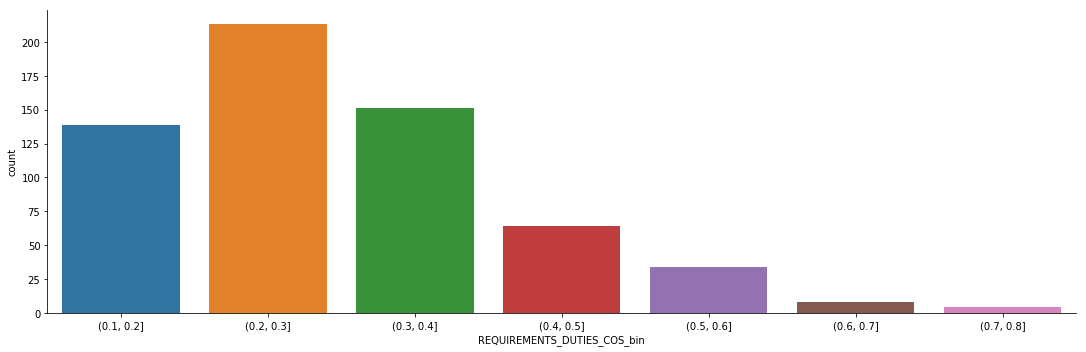

In [313]:
df4=df3.copy()
df4['REQUIREMENTS_DUTIES_COS_bin'] = pd.cut(df4['REQUIREMENTS_DUTIES_COS'],bins=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8])
sns.catplot(data=df4,x="REQUIREMENTS_DUTIES_COS_bin",kind="count",aspect=3)

In [314]:
# Labelling :
df3['REQUIREMENTS_DUTIES_SIM']=(df3['REQUIREMENTS_DUTIES_COS']<=0.25)*1
df3.head(2)

,TITLE,REQUIREMENTS,APPLICATION PROCESS,DUTIES,HOW TO APPLY,PROCESS NOTES,SELECTION PROCEDURE,WHERE TO APPLY,REQ_MERGED,APPLIC_MERGED,...,dale_chall_ap,gunning_fog_ap,REQ_Pronoun,REQ_Pronoun_Count,REQ_Pronoun_Exists,Req_merged_Spell,REQUIREMENTS_PROCESS NOTES_COS,REQUIREMENTS_DUTIES_COS,PROCESS NOTES_DUTIES_COS,REQUIREMENTS_DUTIES_SIM
0,SENIOR HOUSING INSPECTOR,two year full time paid experi citi lo angel ...,[],senior hous inspector supervis employe engag ...,[],1 applic lack six month less requir experi ma...,"[, Examination Weight: Essay . . . . . . . . ...","[, Applications will only be accepted on-line....","[, Two years of full-time paid experience with...","[, Applications will only be accepted on-line....",...,9.82,13.37,"[they, their]",0,0,4,0.184612,0.160302,0.040615,1
1,LEGISLATIVE ASSISTANT,one year full time paid experi class level ma...,[],legisl assist serv one council committe may a...,[],,"[, Examination Weights: Essay . . . . . . . . ...","[, Applications will only be accepted on-line....","[, One year of full-time paid experience in a ...","[, Applications will only be accepted on-line....",...,10.22,11.32,"[they, their]",0,0,2,0.000000,0.086747,0.000000,1


### req process 


In [315]:
print(df4['REQUIREMENTS_PROCESS NOTES_COS'].median(axis=0))
print(df4['REQUIREMENTS_PROCESS NOTES_COS'].describe())

0.14808029637714543
count    684.000000
mean       0.158264
std        0.143153
min        0.000000
25%        0.000000
50%        0.148080
75%        0.254795
max        0.708584
Name: REQUIREMENTS_PROCESS NOTES_COS, dtype: float64


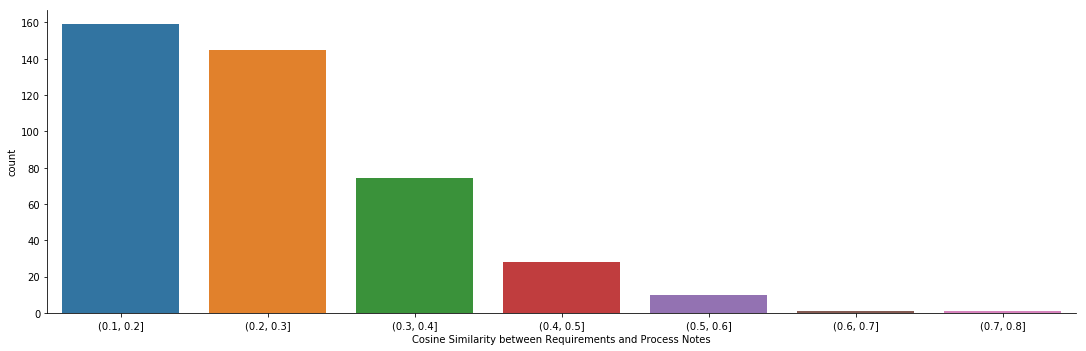

In [316]:
df4['REQUIREMENTS_PROCESS NOTES_COS_bin'] = pd.cut(df4['REQUIREMENTS_PROCESS NOTES_COS'],bins=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8])
ax=sns.catplot(data=df4,x="REQUIREMENTS_PROCESS NOTES_COS_bin",kind="count",aspect=3)
ax.set( xlabel='Cosine Similarity between Requirements and Process Notes')
plt.show()

In [317]:
#Labelling:
df3['REQUIREMENTS_PROCESS NOTES_SIM']=(df3['REQUIREMENTS_PROCESS NOTES_COS']<=0.25)*1

## 14. Document Level Features:

## 14a. Count of words, sentences and average length of sentence in a document:

In [318]:
#Define function to calculate total number of sentences and average length per sentence for each document
def sent_and_word_count(bulletins,path):
    s={}
    for i in range(len(bulletins)):
        with open(path+bulletins[i],encoding="ISO-8859-1") as f:
            idx = 0
            lines = f.readlines()
            while len(lines[idx].rstrip(' \n\r\t')) == 0:
                    idx = idx + 1
            key = lines[idx].rstrip('\r\n\t')
            
        with open(path+bulletins[i],encoding="ISO-8859-1") as f:
            a = f.read()
            phrases = sent_tokenize(a)
            sum_sent_length = 0
            for p in phrases:
                countwords = nltk.word_tokenize(p)
                words_in_sentence = len(countwords)
                sum_sent_length = sum_sent_length + words_in_sentence
        Numberofsentences = len(phrases)
        s[key]= [Numberofsentences,(sum_sent_length/Numberofsentences),sum_sent_length]
    return s

In [319]:
#Create dataframe from the word and sentence count dictionary
df_doc_counts = pd.DataFrame.from_dict(sent_and_word_count(bulletins,path),orient='index').reset_index()

In [341]:
df_doc_counts.columns  = ["TITLE","SENTENCE_COUNT", "AVG_SENT_LENGTH","WORD_COUNT"]

In [357]:
df_doc_counts.AVG_SENT_LENGTH

,TITLE,SENTENCE_COUNT,AVG_SENT_LENGTH,WORD_COUNT
0,SENIOR HOUSING INSPECTOR,263,5.893536,1550
1,LEGISLATIVE ASSISTANT,256,5.335938,1366
2,DISTRICT SUPERVISOR ANIMAL SERVICES,415,5.178313,2149
3,LEGISLATIVE REPRESENTATIVE,344,6.627907,2280
4,GALLERY ATTENDANT,188,6.186170,1163
5,TRUCK AND EQUIPMENT DISPATCHER,296,6.222973,1842
6,COMMUNICATIONS CABLE SUPERVISOR,203,8.206897,1666
7,SHIP CARPENTER,348,5.442529,1894
8,PRINCIPAL SECURITY OFFICER,266,5.120301,1362
9,PRINCIPAL CIVIL ENGINEERING DRAFTING TECHNICIAN,275,6.316364,1737


In [365]:
a = list_to_string(df3.REQ_MERGED[1])

In [368]:
a

' One year of full-time paid experience in a class at the level of Management Analyst performing professional administrative, legislative, research or analytical duties.  NOTES:  1. For qualifying work experience gained outside of the City of Los Angeles, the term "professional experience" applies to positions that require possession of a degree from an accredited four-year college or university in order to obtain that position.  Therefore, to be considered "professional," non-City qualifying experience must be gained in positions after obtaining a four-year degree. 2. Applicants who lack six months or less of the above experience may file for this examination.  However, they cannot be appointed until the full experience requirement is met. 3. A valid California driver\'s license may be required. Candidates may not be eligible for appointment to these positions if their record within the last 36 months reflects three or more moving violations and/or at-fault accidents, or a conviction 

In [370]:
len(sent_tokenize(a))

11

## 14b. Function to get scores:

In [322]:
sid = SentimentIntensityAnalyzer()

In [323]:
def get_scores_test1(bulletins):
    my_dict = {}
    all_files = []
    for i in range(len(bulletins)):
        with open(path+bulletins[i],encoding="ISO-8859-1") as f:
            lines = f.readlines()
            idx = 0
            while len(lines[idx].rstrip(' \n\r\t')) == 0:
                    idx = idx + 1
            key = lines[idx].rstrip('\r\n\t')
            
        with open(path+bulletins[i],encoding="ISO-8859-1") as f:
            data="".join(line.rstrip() for line in f)
            sentiment_scores = sid.polarity_scores(data)
            r = Readability(data)
            fk = r.flesch_kincaid()
            fr = r.flesch()
            dc = r.dale_chall()
            ari = r.ari()
            gf = r.gunning_fog()
            my_dict[key]= [sentiment_scores,fk.grade_level,fr.score,fr.ease,
                                    dc.grade_levels,ari.grade_levels,gf.grade_level]
    a = my_dict
    all_files.append(a)
    #df = pd.concat([pd.Series(d) for d in all_files], axis=1) 
    df = pd.DataFrame(a).T.reset_index()
    return df

In [324]:
df_doc_scores = get_scores_test1(bulletins)

In [325]:
len(df_doc_scores)

684

In [326]:
df_doc_scores.columns = ['TITLE','Sentiment_scores', 'FK_GLevel','FE_score','FE_ease','DC_GLevel','ARI_GLevel',\
               'GF_GLevel']

df_doc_scores[['Neg','Neutral','Positive','Compound']] = df_doc_scores.Sentiment_scores.apply(pd.Series)
df_doc_scores.drop(columns='Sentiment_scores',axis=1,inplace=True)

In [327]:
df_doc_scores

,TITLE,FK_GLevel,FE_score,FE_ease,DC_GLevel,ARI_GLevel,GF_GLevel,Neg,Neutral,Positive,Compound
0,SENIOR HOUSING INSPECTOR,10,33.6842,difficult,[college_graduate],[10],11,0.033,0.906,0.061,0.9832
1,LEGISLATIVE ASSISTANT,9,39.9481,difficult,[college_graduate],[9],10,0.030,0.917,0.053,0.9636
2,DISTRICT SUPERVISOR ANIMAL SERVICES,10,32.8893,difficult,[college_graduate],[11],11,0.019,0.911,0.070,0.9961
3,LEGISLATIVE REPRESENTATIVE,10,31.7223,difficult,[college_graduate],[11],12,0.016,0.914,0.070,0.9973
4,GALLERY ATTENDANT,9,41.2265,difficult,[college_graduate],[9],11,0.020,0.893,0.088,0.9944
5,TRUCK AND EQUIPMENT DISPATCHER,9,36.1364,difficult,[college_graduate],[11],11,0.013,0.918,0.069,0.9962
6,COMMUNICATIONS CABLE SUPERVISOR,10,32.6799,difficult,[college_graduate],[11],12,0.038,0.898,0.064,0.9833
7,SHIP CARPENTER,8,42.3797,difficult,[college],[9],10,0.023,0.911,0.066,0.9929
8,PRINCIPAL SECURITY OFFICER,9,34.9027,difficult,[college_graduate],[10],10,0.038,0.865,0.097,0.9943
9,PRINCIPAL CIVIL ENGINEERING DRAFTING TECHNICIAN,10,34.4678,difficult,[college_graduate],[11],11,0.019,0.918,0.063,0.9923


In [328]:
df_doc_scores.FE_ease.value_counts()

difficult         621
very_confusing     63
Name: FE_ease, dtype: int64

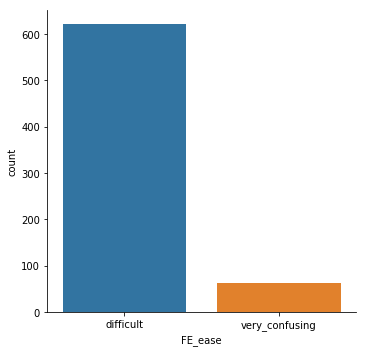

In [329]:
sns.catplot(data=df_doc_scores,x='FE_ease',kind = 'count')

In [330]:
df_doc_scores.DC_GLevel.value_counts()

[college_graduate]    636
[college]              48
Name: DC_GLevel, dtype: int64

In [331]:
df_doc_scores['GF_GLevel'] = df_doc_scores['GF_GLevel'].astype(str)
df_doc_scores['DC_GLevel'] = df_doc_scores['DC_GLevel'].astype(str)

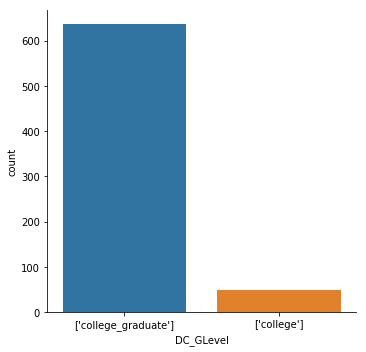

In [332]:
sns.catplot(data=df_doc_scores,x='DC_GLevel',kind = 'count')

In [333]:
df_doc_scores.GF_GLevel.value_counts()

11                  257
10                  201
12                  136
9                    42
college              39
8                     7
college_graduate      2
Name: GF_GLevel, dtype: int64

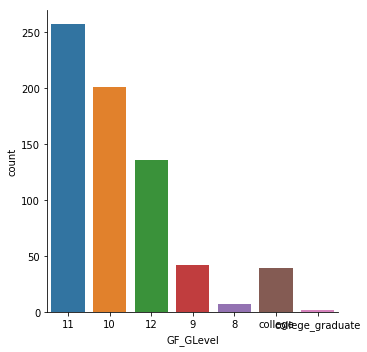

In [334]:
sns.catplot(data=df_doc_scores,x='GF_GLevel',kind = 'count')

In [335]:
df_doc_scores['Compound'].describe()

count    684.000000
mean       0.982847
std        0.072678
min       -0.131400
25%        0.987475
50%        0.993800
75%        0.996700
max        0.999400
Name: Compound, dtype: float64

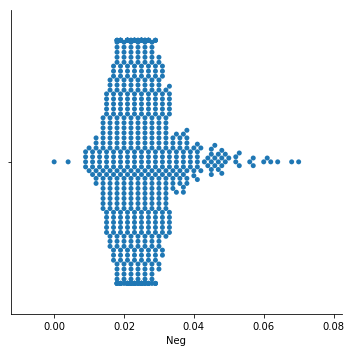

In [336]:
sns.catplot(data=df_doc_scores,x='Neg',kind = 'swarm')

## Merging :


In [340]:
df_doc_counts.head(2)

,index,0,1,2
0,SENIOR HOUSING INSPECTOR,263,5.893536,1550
1,LEGISLATIVE ASSISTANT,256,5.335938,1366


In [342]:
df_merged = pd.merge(df3,df_doc_scores,on = "TITLE", how= 'left')
df_merged = pd.merge(df_merged,df_doc_counts,on = "TITLE", how= 'left')

In [343]:
len(df_merged)

684

In [347]:
df_merged.REQ_MERGED_WORDCOUNT.isna().sum()

0

In [352]:
df_merged['Prop_counts'] = (df_merged['REQ_MERGED_WORDCOUNT'] / df_merged['WORD_COUNT'])

In [354]:
df_merged['Prop_counts'].describe()

count    684.000000
mean       0.180877
std        0.059050
min        0.000000
25%        0.138702
50%        0.175065
75%        0.215631
max        0.410673
Name: Prop_counts, dtype: float64

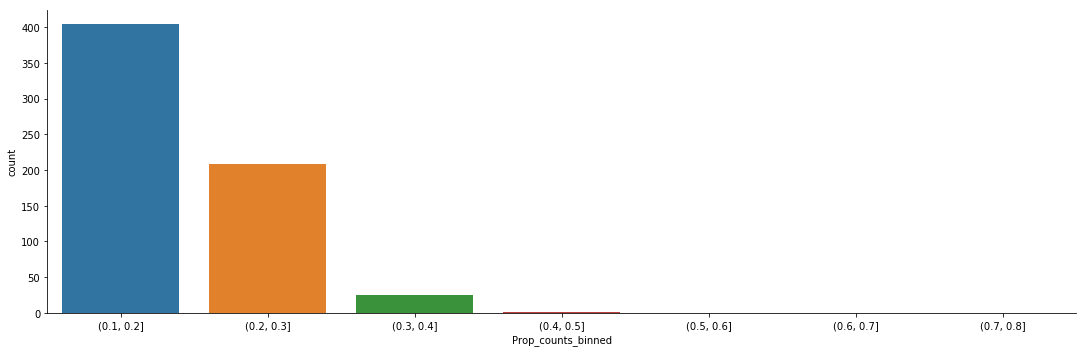

In [356]:
df_merged_1=df_merged.copy()
df_merged_1['Prop_counts_binned'] = pd.cut(df_merged_1['Prop_counts'],bins=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8])
sns.catplot(data=df_merged_1,x="Prop_counts_binned",kind="count",aspect=3)

In [202]:
def clean_major(a):
    try:
        if 'apprenticeship' in a:
            b = 'Apprenticeship'
        elif 'major' in a:
            b = 'Major'
        else:
            b = 'Not_available'
    except:
        b = 'None'
    return b

In [203]:
df_merged['Major_cleaned'] = df_merged['MAJOR'].apply(clean_major)

In [207]:
df_merged.drop(columns = ['REQUIREMENTS', 'APPLICATION PROCESS', 'DUTIES','HOW TO APPLY', 'PROCESS NOTES',
                          'SELECTION PROCEDURE','WHERE TO APPLY','REQ_MERGED', 'APPLIC_MERGED','REQUIREMENTS_STR',
                          'REQ_MERGED_SCORES','SP_UPD', 'SP_SCORES','AP_MERG_UPD','AP_MERG_SCORES','REQ_Pronoun',
                           'DC_GLevel','MAJOR'], 
               axis=1, inplace= True)

In [215]:
df_merged.dtypes

TITLE                               object
Duration                             int64
Binned_Duration                   category
REQ_EXP_YEARS                        int64
Selection_Process_Complexity       float64
Annual_Salary_Present                int64
Additional_info_Present              int64
Qualifications_review_Present        int64
FULL/PART                            int64
REQ_MERGED_WORDCOUNT                 int64
APPLIC_MERGED_WORDCOUNT              int64
SELECTION_PROCEDURE_WORDCOUNT        int64
SCHOOL_TYPE                         object
SCHOOL_PRESENT                       int64
flesch_score_reqm                  float64
flesch_grade_reqm                  float64
automated_readability_reqm         float64
dale_chall_reqm                    float64
gunning_fog_reqm                   float64
flesch_score_sp                    float64
flesch_grade_sp                    float64
automated_readability_sp           float64
dale_chall_sp                      float64
gunning_fog

In [211]:
df_merged['SCHOOL_TYPE'] = df_merged['SCHOOL_TYPE'].apply(list_to_string)
df_merged['ARI_GLevel'] = df_merged['ARI_GLevel'].apply(list_to_string)



In [218]:
df_merged['FK_GLevel'] = df_merged['FK_GLevel'].astype(int)
df_merged['FE_score'] = df_merged['FE_score'].astype(int)
df_merged['FE_ease'] = df_merged['FE_ease'].astype(str)
df_merged['ARI_GLevel'] = df_merged['ARI_GLevel'].astype(str)
df_merged['GF_GLevel'] = df_merged['GF_GLevel'].astype(str)
df_merged.Selection_Process_Complexity = df_merged.Selection_Process_Complexity.fillna(float(-1))

In [ ]:
df_merged = pd.get_dummies(columns=['FE_ease','Major_cleaned','SCHOOL_TYPE','ARI_GLevel','GF_GLevel'],data=df_merged)

In [ ]:
df_merged[df_merged.SCHOOL_TYPE == ''].T

In [219]:
df_merged.isna().sum()

TITLE                              0
Duration                           0
Binned_Duration                   85
REQ_EXP_YEARS                      0
Selection_Process_Complexity       0
Annual_Salary_Present              0
Additional_info_Present            0
Qualifications_review_Present      0
FULL/PART                          0
REQ_MERGED_WORDCOUNT               0
APPLIC_MERGED_WORDCOUNT            0
SELECTION_PROCEDURE_WORDCOUNT      0
SCHOOL_TYPE                        0
SCHOOL_PRESENT                     0
flesch_score_reqm                  0
flesch_grade_reqm                  0
automated_readability_reqm         0
dale_chall_reqm                    0
gunning_fog_reqm                   0
flesch_score_sp                    0
flesch_grade_sp                    0
automated_readability_sp           0
dale_chall_sp                      0
gunning_fog_sp                     0
flesch_score_ap                    0
flesch_grade_ap                    0
automated_readability_ap           0
d

## CLUSTERING: